In [3]:
from util.bpc_util import *

In [4]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

/Users/Kevin/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [5]:
plt.rcParams['figure.figsize'] = (7,5)

In [6]:
%load_ext autoreload

In [7]:
%autoreload

# Synthetic Dataset 

We run the tests on the synthetic dataset, with the following settings:

* Normalized Laplacian (i.e. $\chi_k$ are now normalized by degree matrix $D$)
* ...

## Regime 1
$$\epsilon = \tau^2, \gamma = \tau^{\alpha}$$

This corresponds to ``little_oh = False``

In [ ]:
rand = False
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
little_oh = False
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_lo_%d' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s, int(little_oh))
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test(T, ALPHAS, Ns, B, labeled, u, W_0, little_oh=little_oh) 

syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
          val_str='TRC', save=_save, Jval=4, little_oh=little_oh)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
          val_str='TRCBC', save=_save, Jval=4, little_oh=little_oh)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
          val_str='BIAS', save=_save, Jval=6, little_oh=little_oh)


## Regime 2
$$\epsilon = \tau^3, \gamma = \tau^{\alpha}$$

This corresponds to ``little_oh = True``

In [ ]:
rand = False
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
little_oh = True
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_lo_%d' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s, int(little_oh))
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test(T, ALPHAS, Ns, B, labeled, u, W_0, little_oh=little_oh) 

syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
          val_str='TRC', save=_save, Jval=4, little_oh=little_oh)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
          val_str='TRCBC', save=_save, Jval=4, little_oh=little_oh)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
          val_str='BIAS', save=_save, Jval=6, little_oh=little_oh)


# Epsilon = 0 Case

In [ ]:
rand = False
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_zero' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s)
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test0(T, ALPHAS, Ns, B, labeled, u, W_0) 



In [ ]:
syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
          val_str='TRC', save=_save, Jval=1)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
          val_str='TRCBC', save=_save, Jval=1)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
          val_str='BIAS', save=_save, Jval=1)


### Observations

The slope in the BIAS plots do follow the expected curve of $\tau^{4\alpha}$.

# Voting Records Code

In [15]:
%autoreload

In [19]:
sup_percent = 0.1
n = 10
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]
SIGMAS = [0.25*i for i in range(1, 10)]

TRC, TRCBC, BIAS = voting_run_test(SIGMAS, T, ALPHAS, rand=True, sup_percent=sup_percent, normalized=True)

Spectral gap evals are: [0.0005787092990163758, 0.003770524450027901, 0.006435761130945572, 0.008103279118204298, 0.00916545407460334, 0.00988084164619929, 0.0103878217570057, 0.01076227841046995, 0.011048010742585657]


sigma = 0.250


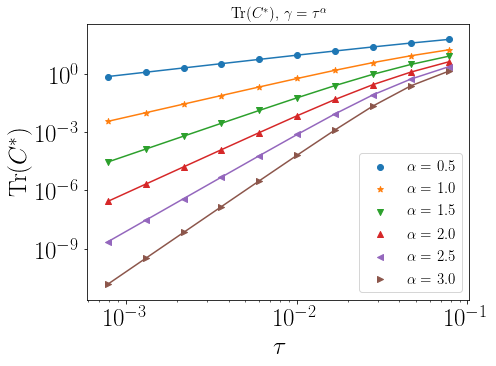

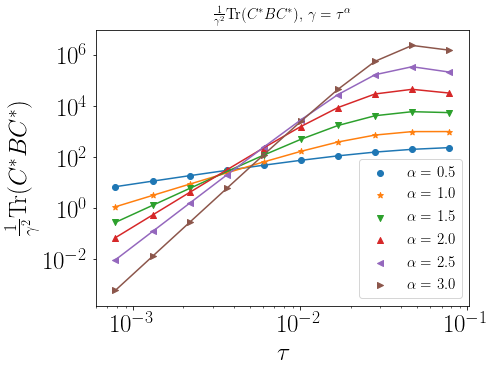

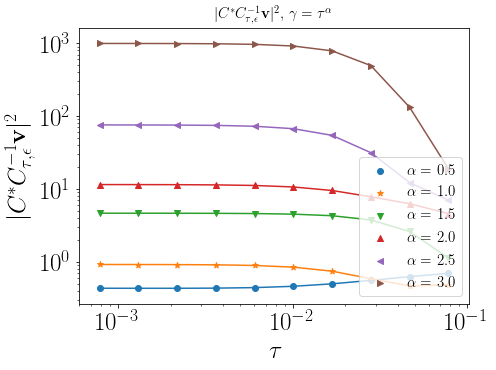

sigma = 0.500


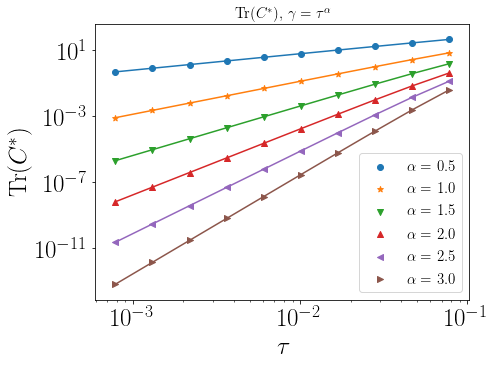

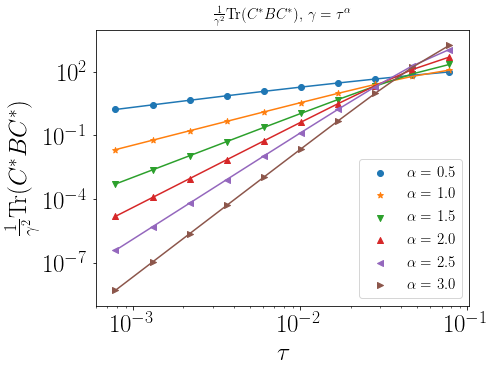

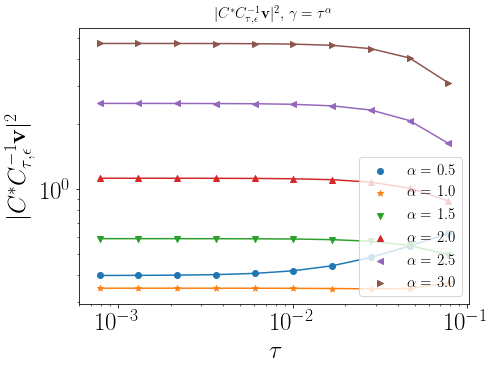

sigma = 0.750


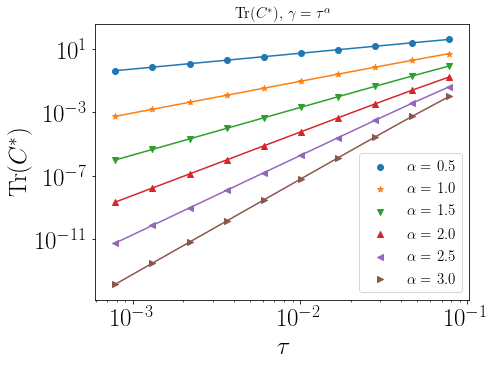

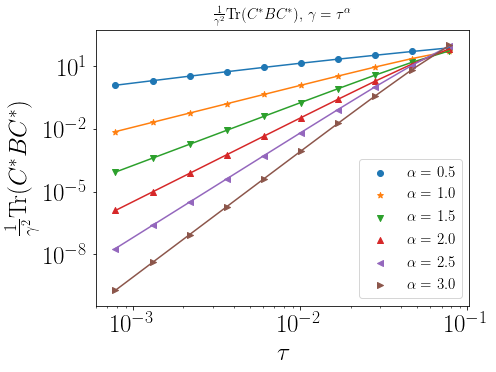

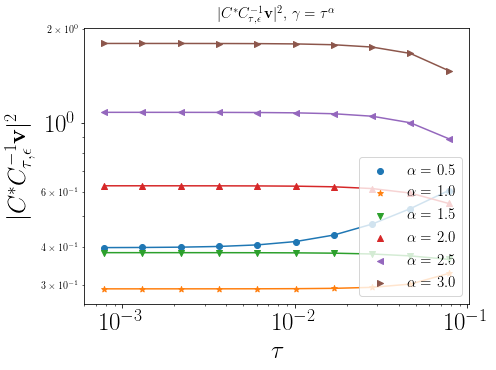

sigma = 1.000


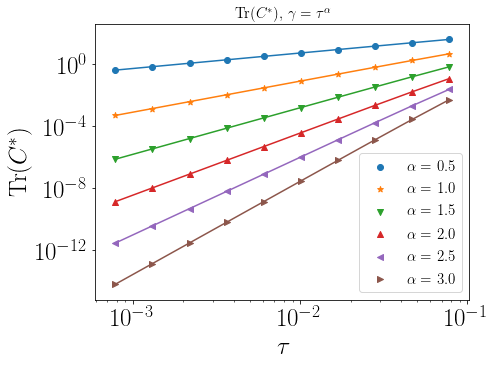

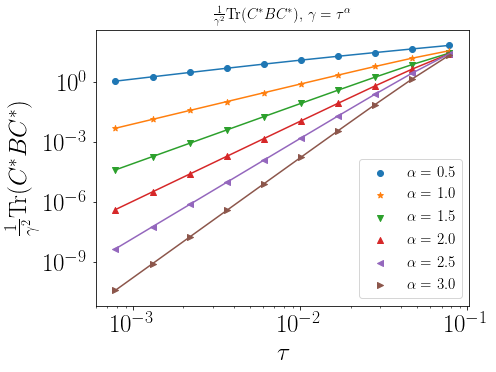

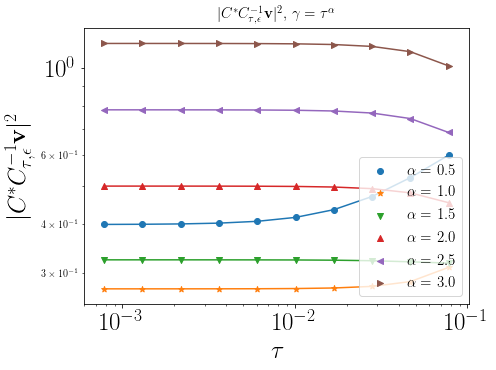

sigma = 1.250


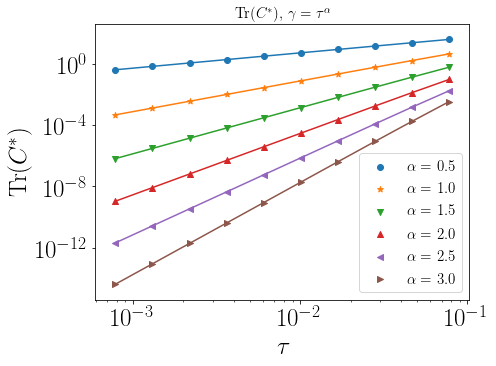

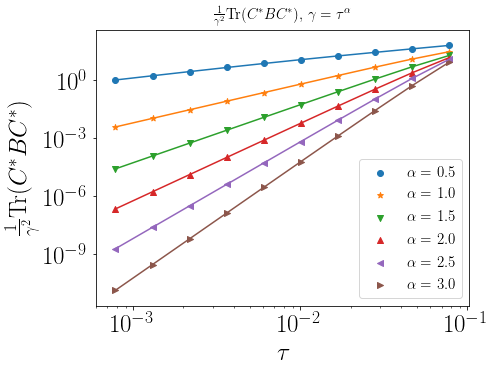

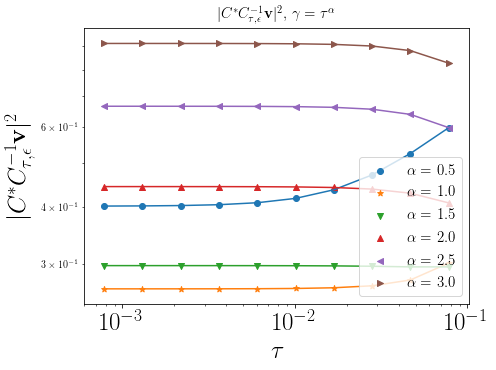

sigma = 1.500


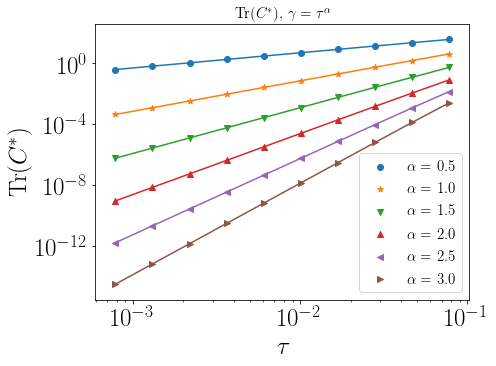

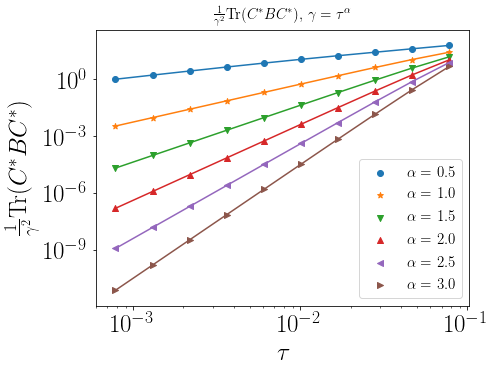

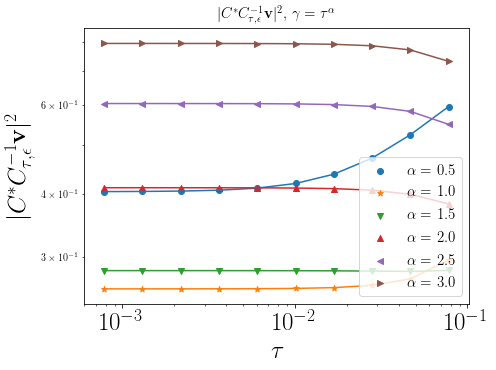

sigma = 1.750


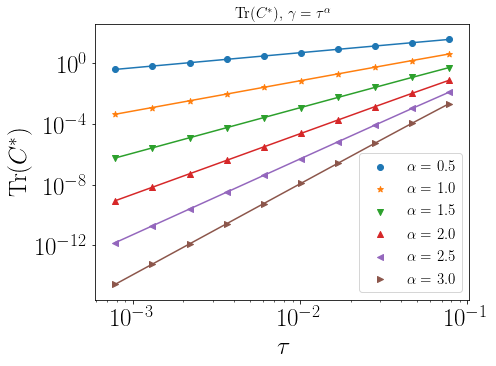

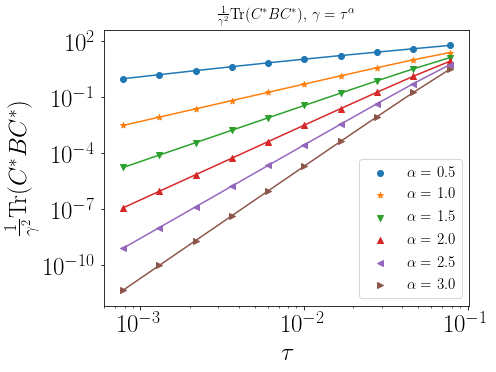

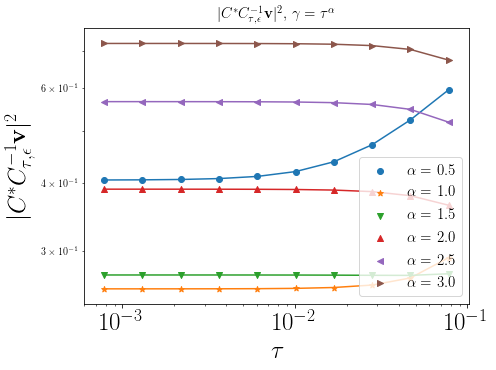

sigma = 2.000


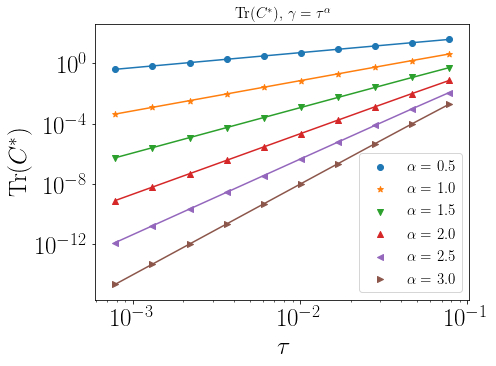

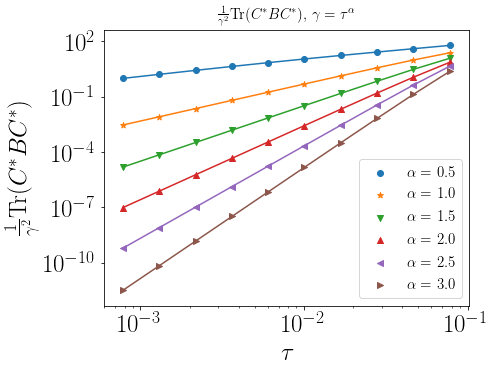

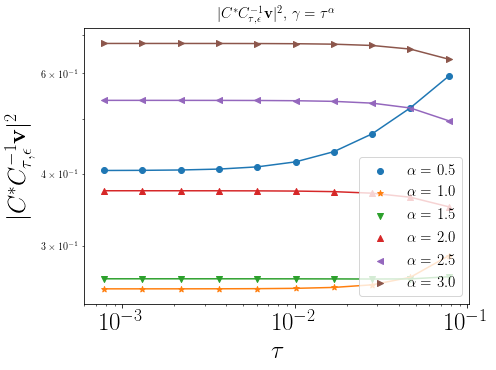

sigma = 2.250


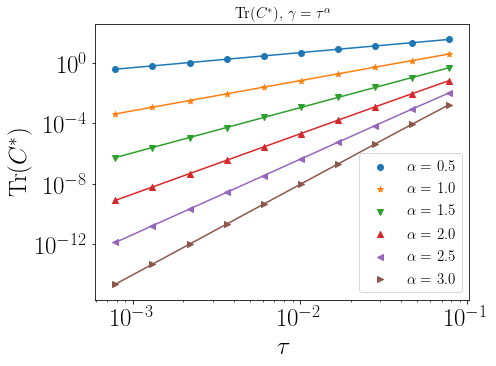

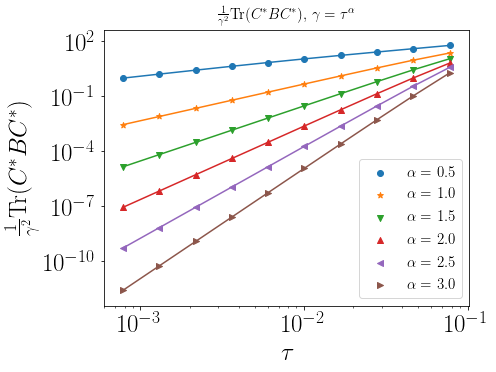

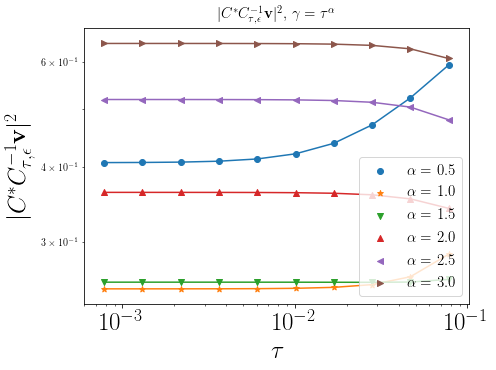

In [21]:
_save = False
param_str = 'VotingRecords'

for i,sigma in enumerate(SIGMAS):
    print("sigma = %1.3f" % sigma)
    voting_plot_data(T, TRC[:,:, i], ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
              val_str='TRC', save=_save)
    voting_plot_data(T, TRCBC[:,:, i], ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
              val_str='TRCBC', save=_save)
    voting_plot_data(T, BIAS[:,:,i], ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
              val_str='BIAS', save=_save)

alpha = 0.500


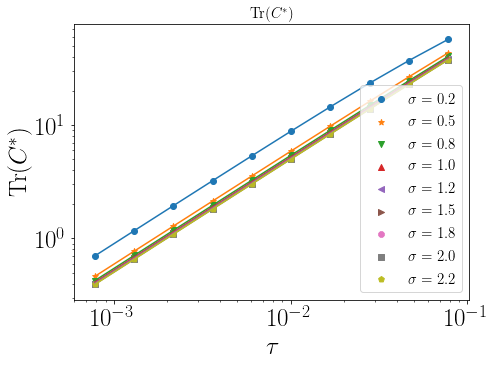

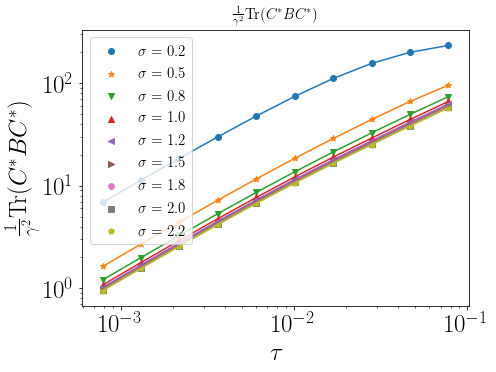

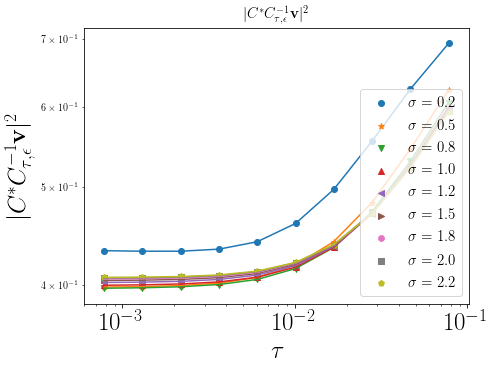

alpha = 1.000


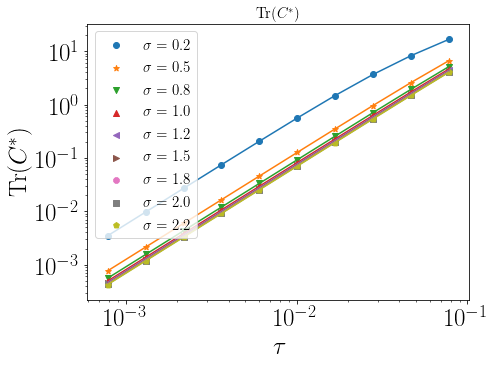

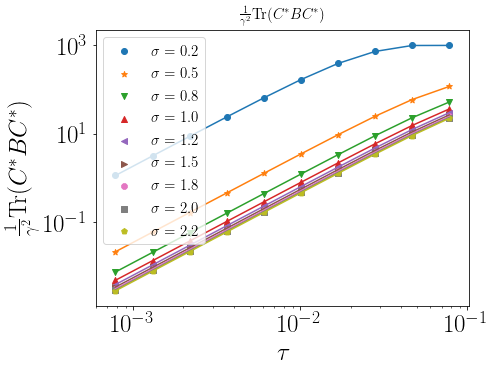

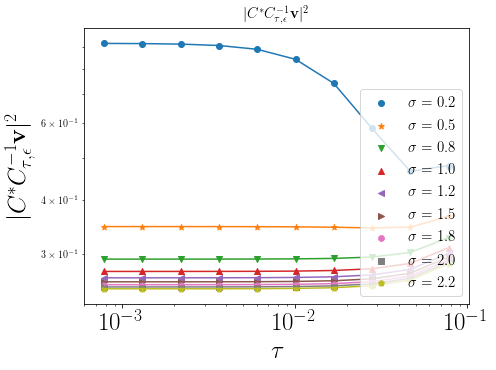

alpha = 1.500


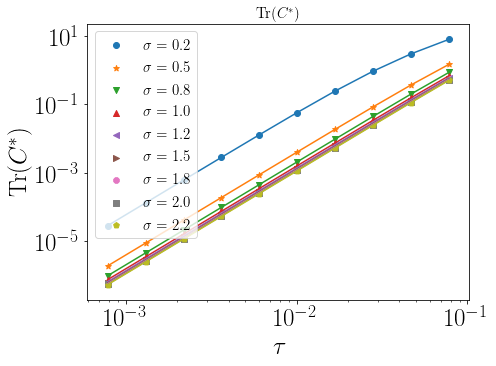

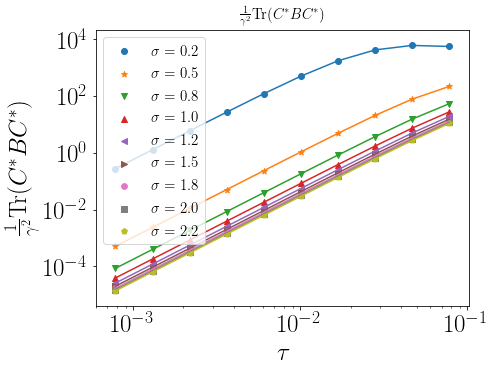

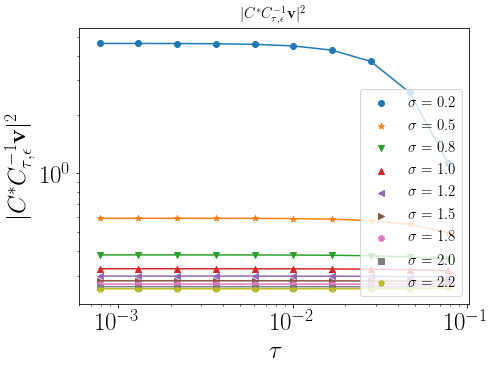

alpha = 2.000


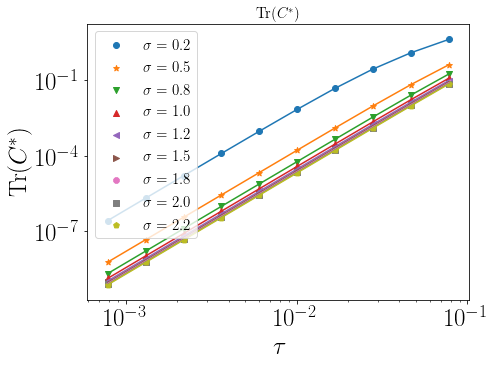

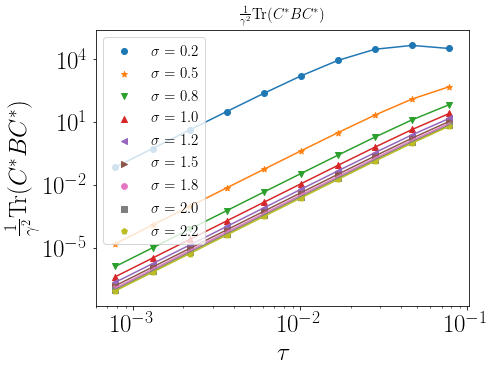

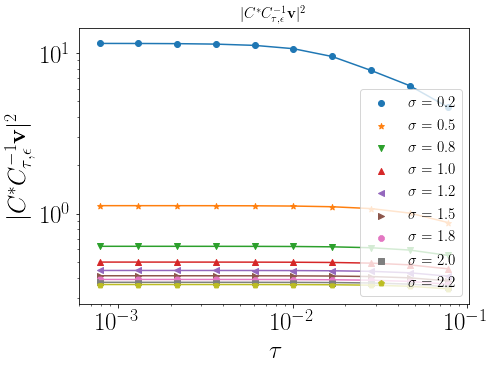

alpha = 2.500


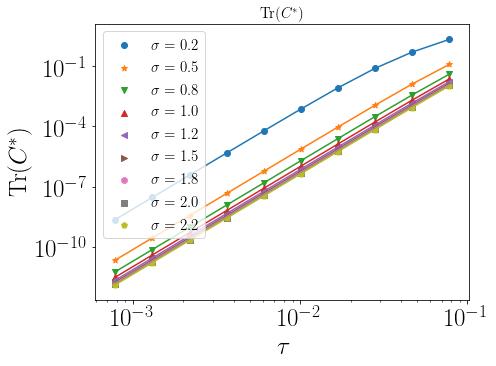

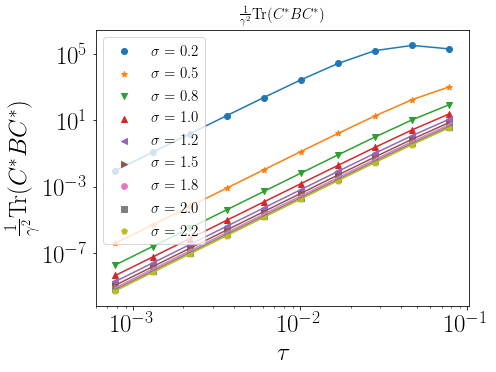

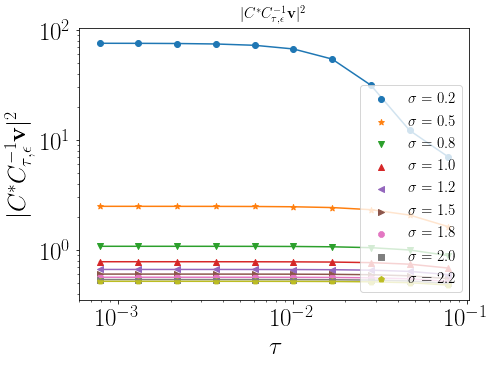

alpha = 3.000


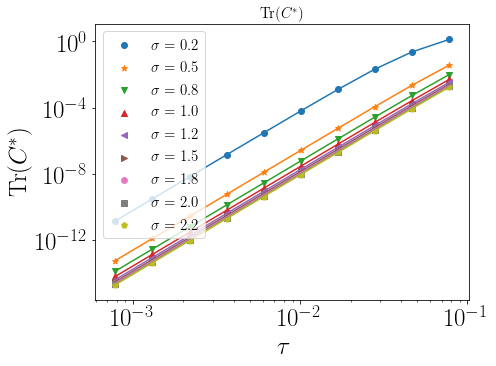

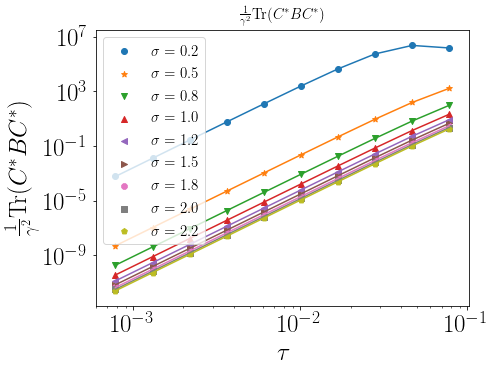

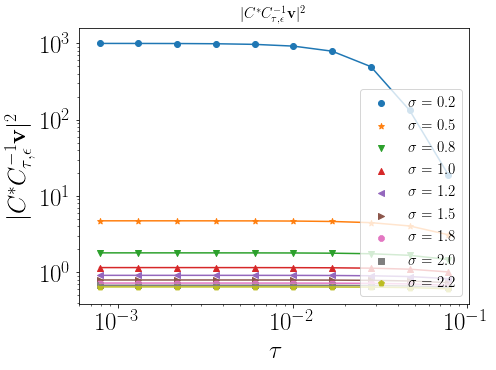

In [20]:
_save = False
param_str = 'VotingRecords'

for i,alpha in enumerate(ALPHAS):
    print("alpha = %1.3f" % alpha)
    voting_plot_data2(T, TRC[i,:,:], SIGMAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
              val_str='TRC', save=_save)
    voting_plot_data2(T, TRCBC[i,:,:], SIGMAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
              val_str='TRCBC', save=_save)
    voting_plot_data2(T, BIAS[i,:,:], SIGMAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
              val_str='BIAS', save=_save)

### Observations

The BIAS plot shows that we are limited by the value of $\epsilon$ which is constant for each value of the kernel width, $\sigma$.